C:\Users\allen\Miniconda3\envs\qtdev\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<IPython.core.display.Javascript object>


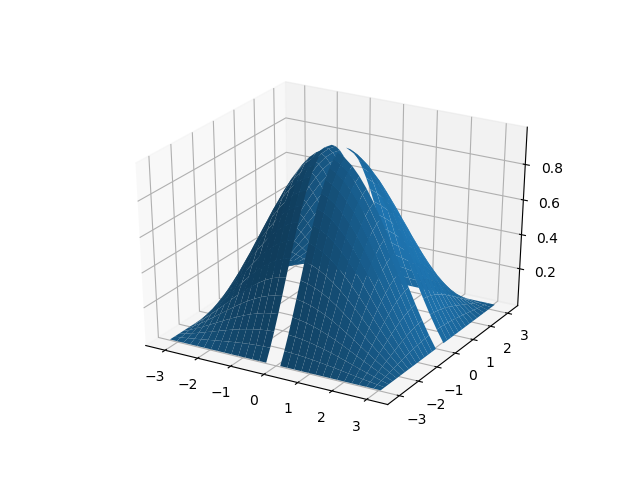

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

f = lambda x, y: np.sin(x)*np.sin(y)/(x*y)

xs, ys = np.mgrid[-np.pi:np.pi:31j, -np.pi:np.pi:31j]
zs = f(xs, ys)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X=xs, Y=ys, Z=zs)

<IPython.core.display.Javascript object>


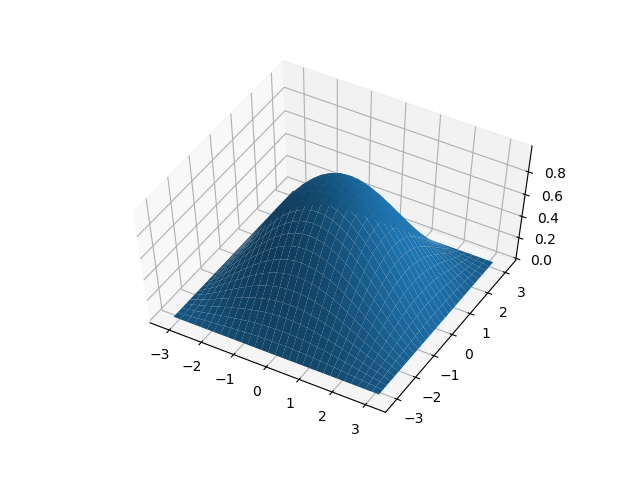

In [50]:
from scipy import interpolate

# integer arrays for indexing
x_indx, y_indx = np.meshgrid(np.arange(0, zs.shape[1]),
                             np.arange(0, zs.shape[0]))

# mask all invalid values
zs_masked = np.ma.masked_invalid(zs)

# retrieve the valid, non-Nan, defined values
valid_xs = x_indx[~zs_masked.mask]
valid_ys = y_indx[~zs_masked.mask]
valid_zs = zs_masked[~zs_masked.mask]

# generate interpolated array of z-values
zs_interp = interpolate.griddata((valid_xs, valid_ys), valid_zs.ravel(),
                                 (x_indx, y_indx), method='cubic')

# finally, plot the data 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X=xs, Y=ys, Z=zs_interp)

In [52]:
from scipy import interpolate
help(interpolate.griddata)

Help on function griddata in module scipy.interpolate.ndgriddata:

griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)
    Interpolate unstructured D-dimensional data.
    
    Parameters
    ----------
    points : ndarray of floats, shape (n, D)
        Data point coordinates. Can either be an array of
        shape (n, D), or a tuple of `ndim` arrays.
    values : ndarray of float or complex, shape (n,)
        Data values.
    xi : 2-D ndarray of float or tuple of 1-D array, shape (M, D)
        Points at which to interpolate data.
    method : {'linear', 'nearest', 'cubic'}, optional
        Method of interpolation. One of
    
        ``nearest``
          return the value at the data point closest to
          the point of interpolation.  See `NearestNDInterpolator` for
          more details.
    
        ``linear``
          tessellate the input point set to n-dimensional
          simplices, and interpolate linearly on each simplex.  See
          `Li

In [64]:
from matplotlib import cm
from matplotlib.pyplot import colormaps

In [54]:
help(cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    See :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    See :doc:`/tutorials/colors/colormaps` for an in-depth discussion of colormaps.

CLASSES
    builtins.object
        ScalarMappable
    
    class ScalarMappable(builtins.object)
     |  This is a mixin class to support scalar data to RGBA mapping.
     |  The ScalarMappable makes use of data normalization before returning
     |  RGBA colors from the given colormap.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, norm=None, cmap=None)
     |      Parameters
     |      ----------
     |      norm : :class:`matplotlib.colors.Normalize` instance
     |          The normalizing object which scales data, typically into the
     |          interval ``[0, 1]``.
     |          If *None*, *norm* defaults to a *colors.Normali

In [65]:
colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

In [68]:
[i for i in cm.datad.keys() if i not in colormaps()]

[]

In [70]:
[i for i in colormaps() if '_r' not in i]

['Accent',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'Dark2',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'Paired',
 'Pastel1',
 'Pastel2',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Set1',
 'Set2',
 'Set3',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cividis',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'inferno',
 'jet',
 'magma',
 'nipy_spectral',
 'ocean',
 'pink',
 'plasma',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'terrain',
 'viridis',
 'winter']

In [71]:
from sympy import *

In [75]:
sympify('f(x)').subs('x', 5)\


f(5)

In [1]:
from pyqtgraph.Qt import QtCore, QtGui
import pyqtgraph.opengl as gl
import pyqtgraph as pg
import OpenGL.GL as ogl
import numpy as np

class CustomTextItem(gl.GLGraphicsItem.GLGraphicsItem):
    def __init__(self, X, Y, Z, text):
        gl.GLGraphicsItem.GLGraphicsItem.__init__(self)
        self.text = text
        self.X = X
        self.Y = Y
        self.Z = Z

    def setGLViewWidget(self, GLViewWidget):
        self.GLViewWidget = GLViewWidget

    def setText(self, text):
        self.text = text
        self.update()

    def setX(self, X):
        self.X = X
        self.update()

    def setY(self, Y):
        self.Y = Y
        self.update()

    def setZ(self, Z):
        self.Z = Z
        self.update()

    def paint(self):
        self.GLViewWidget.qglColor(QtCore.Qt.white)
        self.GLViewWidget.renderText(self.X, self.Y, self.Z, self.text)


class Custom3DAxis(gl.GLAxisItem):
    """Class defined to extend 'gl.GLAxisItem'."""
    def __init__(self, parent, color=(1.,1.,1.,.6)):
        gl.GLAxisItem.__init__(self)
        self.parent = parent
        self.c = color

    def add_labels(self):
        """Adds axes labels."""
        x,y,z = self.size()
        #X label
        self.xLabel = CustomTextItem(X=x/2, Y=-y/20, Z=-z/20, text="X")
        self.xLabel.setGLViewWidget(self.parent)
        self.parent.addItem(self.xLabel)
        #Y label
        self.yLabel = CustomTextItem(X=-x/20, Y=y/2, Z=-z/20, text="Y")
        self.yLabel.setGLViewWidget(self.parent)
        self.parent.addItem(self.yLabel)
        #Z label
        self.zLabel = CustomTextItem(X=-x/20, Y=-y/20, Z=z/2, text="Z")
        self.zLabel.setGLViewWidget(self.parent)
        self.parent.addItem(self.zLabel)

    def add_tick_values(self, xticks=[], yticks=[], zticks=[]):
        """Adds ticks values."""
        x,y,z = self.size()
        xtpos = np.linspace(0, x, len(xticks))
        ytpos = np.linspace(0, y, len(yticks))
        ztpos = np.linspace(0, z, len(zticks))
        #X label
        for i, xt in enumerate(xticks):
            val = CustomTextItem(X=xtpos[i], Y=-y/20, Z=-z/20, text=str(xt))
            val.setGLViewWidget(self.parent)
            self.parent.addItem(val)
        #Y label
        for i, yt in enumerate(yticks):
            val = CustomTextItem(X=-x/20, Y=ytpos[i], Z=-z/20, text=str(yt))
            val.setGLViewWidget(self.parent)
            self.parent.addItem(val)
        #Z label
        for i, zt in enumerate(zticks):
            val = CustomTextItem(X=-x/20, Y=-y/20, Z=ztpos[i], text=str(zt))
            val.setGLViewWidget(self.parent)
            self.parent.addItem(val)

    def paint(self):
        self.setupGLState()
        if self.antialias:
            ogl.glEnable(ogl.GL_LINE_SMOOTH)
            ogl.glHint(ogl.GL_LINE_SMOOTH_HINT, ogl.GL_NICEST)
        ogl.glBegin(ogl.GL_LINES)

        x,y,z = self.size()
        #Draw Z
        ogl.glColor4f(self.c[0], self.c[1], self.c[2], self.c[3])
        ogl.glVertex3f(0, 0, 0)
        ogl.glVertex3f(0, 0, z)
        #Draw Y
        ogl.glColor4f(self.c[0], self.c[1], self.c[2], self.c[3])
        ogl.glVertex3f(0, 0, 0)
        ogl.glVertex3f(0, y, 0)
        #Draw X
        ogl.glColor4f(self.c[0], self.c[1], self.c[2], self.c[3])
        ogl.glVertex3f(0, 0, 0)
        ogl.glVertex3f(x, 0, 0)
        ogl.glEnd()


app = QtGui.QApplication([])
fig1 = gl.GLViewWidget()
background_color = app.palette().color(QtGui.QPalette.Background)
fig1.setBackgroundColor('#31363b')

n = 51
y = np.linspace(-10,10,n)
x = np.linspace(-10,10,100)
for i in range(n):
    yi = np.array([y[i]]*100)
    d = (x**2 + yi**2)**0.5
    z = 10 * np.cos(d) / (d+1)
    pts = np.vstack([x,yi,z]).transpose()
    plt = gl.GLLinePlotItem(pos=pts, color=pg.glColor((i,n*1.3)), width=(i+1)/10., antialias=True)
    fig1.addItem(plt)


axis = Custom3DAxis(fig1, color=(0.2,0.2,0.2,.6))
axis.setSize(x=12, y=12, z=12)
# Add axes labels
axis.add_labels()
# Add axes tick values
axis.add_tick_values(xticks=[0,4,8,12], yticks=[0,6,12], zticks=[0,3,6,9,12])
fig1.addItem(axis)
fig1.opts['distance'] = 40

fig1.show()

if __name__ == '__main__':
    import sys
    if (sys.flags.interactive != 1) or not hasattr(QtCore, 'PYQT_VERSION'):
        QtGui.QApplication.instance().exec_()

In [2]:
import pyqtgraph.opengl as gl
help(gl.GLViewWidget.renderText)

Help on built-in function renderText:

renderText(...)
    renderText(self, int, int, str, font: QFont = QFont())
    renderText(self, float, float, float, str, font: QFont = QFont())



In [10]:
help(gl.GLAxisItem)

Help on class GLAxisItem in module pyqtgraph.opengl.items.GLAxisItem:

class GLAxisItem(pyqtgraph.opengl.GLGraphicsItem.GLGraphicsItem)
 |  **Bases:** :class:`GLGraphicsItem <pyqtgraph.opengl.GLGraphicsItem>`
 |  
 |  Displays three lines indicating origin and orientation of local coordinate system.
 |  
 |  Method resolution order:
 |      GLAxisItem
 |      pyqtgraph.opengl.GLGraphicsItem.GLGraphicsItem
 |      PyQt5.QtCore.QObject
 |      sip.wrapper
 |      sip.simplewrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, size=None, antialias=True, glOptions='translucent')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  paint(self)
 |      Called by the GLViewWidget to draw this item.
 |      It is the responsibility of the item to set up its own modelview matrix,
 |      but the caller will take care of pushing/popping.
 |  
 |  setSize(self, x=None, y=None, z=None, size=None)
 |      Set the size of the axes (in its l

In [11]:
help(gl.GLAxisItem.setSize)

Help on function setSize in module pyqtgraph.opengl.items.GLAxisItem:

setSize(self, x=None, y=None, z=None, size=None)
    Set the size of the axes (in its local coordinate system; this does not affect the transform)
    Arguments can be x,y,z or size=QVector3D().



In [6]:
from PyQt5.QtGui import QFont

In [7]:
help(QFont)

Help on class QFont in module PyQt5.QtGui:

class QFont(sip.simplewrapper)
 |  QFont()
 |  QFont(str, pointSize: int = -1, weight: int = -1, italic: bool = False)
 |  QFont(QFont, QPaintDevice)
 |  QFont(QFont)
 |  QFont(Any)
 |  
 |  Method resolution order:
 |      QFont
 |      sip.simplewrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  bold(...)
 |      bold(self) -> bool
 |  
 |  cacheStatistics(...)
 |      cacheStatistics()
 |  
 |  capitalization(...)
 |      capitalization(self) -> QFont.Capitalization
 |  
 |  cleanup(...)
 |      cleanup()
 |  
 |  

In [12]:
import numpy as np
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [14]:
from PyQt5.QtGui import QColor, QRgba64, qRgba
help(qRgba)

Help on built-in function qRgba in module PyQt5.QtGui:

qRgba(...)
    qRgba(int, int, int, int) -> int



In [18]:
np.isinf(-np.inf)

True

In [20]:
zs = np.array([[1,2,np.inf],[3,4,5],[7,4,np.nan]])

In [21]:
np.ma.masked_invalid(zs)

masked_array(
  data=[[1.0, 2.0, --],
        [3.0, 4.0, 5.0],
        [7.0, 4.0, --]],
  mask=[[False, False,  True],
        [False, False, False],
        [False, False,  True]],
  fill_value=1e+20)

In [32]:
xs, ys = np.mgrid[-5:5:51j, -5:5:51j]
f = lambda x, y: 5*np.cos(x)*np.cos(y)/(x*y)
zs = f(xs, ys)

C:\Users\allen\Miniconda3\envs\qtdev\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [33]:
import scipy.interpolate

In [34]:
# integer arrays for indexing
x_indx, y_indx = np.meshgrid(np.arange(0, zs.shape[1]),
                             np.arange(0, zs.shape[0]))
# mask all invalid values
zs_masked = np.ma.masked_invalid(zs)
# retrieve the valid, non-Nan, defined values
valid_xs = x_indx[~zs_masked.mask]
valid_ys = y_indx[~zs_masked.mask]
valid_zs = zs_masked[~zs_masked.mask]
# generate interpolated array of z-values
zs_interp = scipy.interpolate.griddata((valid_xs, valid_ys), valid_zs.ravel(),
                                 (x_indx, y_indx), method='cubic')

<IPython.core.display.Javascript object>


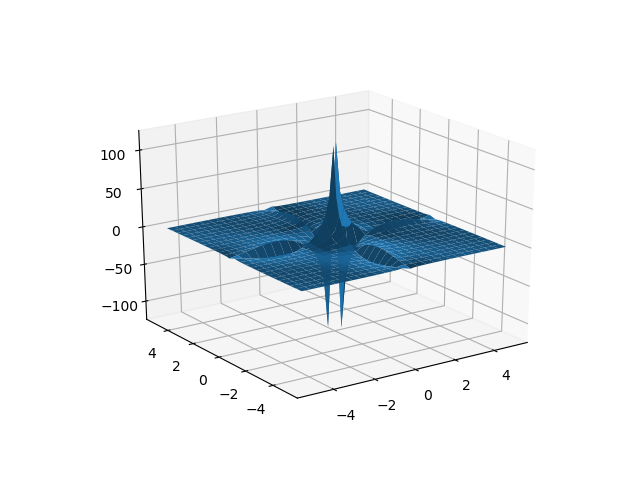

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# finally, plot the data 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X=xs, Y=ys, Z=zs_interp)

In [38]:
def checkval(zs):
    if (not np.isnan(zs.flatten()).any(0)) and (not np.isinf(zs.flatten()).any(0)):
        return zs

In [39]:
checkval(zs)

In [ ]:
import matplotlib.cmap as c

In [45]:
from sympy import *
x, y = symbols('x y')
f = lambdify((x, y), sympify('0*x*y'))

In [50]:
f(1,1)==0

True

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

from scipy.stats import wasserstein_distance as wsd
import matplotlib.pyplot as plt

X  = [-179.0,-177.0,-175.0,-173.0,-171.0,-169.0,-167.0,-165.0,-163.0,-161.0,-159.0,-157.0,-155.0,-153.0,-151.0,-149.0,-147.0,-145.0,-143.0,-141.0,-139.0,-137.0,-135.0,-133.0,-131.0,-129.0,-127.0,-125.0,-123.0,-121.0,-119.0,-117.0,-115.0,-113.0,-111.0,-109.0,-107.0,-105.0,-103.0,-101.0,-99.0,-97.0,-95.0,-93.0,-91.0,-89.0,-87.0,-85.0,-83.0,-81.0,-79.0,-77.0,-75.0,-73.0,-71.0,-69.0,-67.0,-65.0,-63.0,-61.0,-59.0,-57.0,-55.0,-53.0,-51.0,-49.0,-47.0,-45.0,-43.0,-41.0,-39.0,-37.0,-35.0,-33.0,-31.0,-29.0,-27.0,-25.0,-23.0,-21.0,-19.0,-17.0,-15.0,-13.0,-11.0,-9.0,-7.0,-5.0,-3.0,-1.0,1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0,25.0,27.0,29.0,31.0,33.0,35.0,37.0,39.0,41.0,43.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,59.0,61.0,63.0,65.0,67.0,69.0,71.0,73.0,75.0,77.0,79.0,81.0,83.0,85.0,87.0,89.0,91.0,93.0,95.0,97.0,99.0,101.0,103.0,105.0,107.0,109.0,111.0,113.0,115.0,117.0,119.0,121.0,123.0,125.0,127.0,129.0,131.0,133.0,135.0,137.0,139.0,141.0,143.0,145.0,147.0,149.0,151.0,153.0,155.0,157.0,159.0,161.0,163.0,165.0,167.0,169.0,171.0,173.0,175.0,177.0,179.0]
Y1 = [0.00639872025594881,0.006998600279944011,0.010597880423915218,0.011097780443911218,0.015096980603879224,0.017096580683863227,0.021195760847830435,0.021695660867826434,0.02449510097980404,0.021495700859828035,0.01999600079984003,0.022895420915816835,0.01879624075184963,0.016996600679864027,0.015396920615876825,0.016896620675864827,0.013897220555888823,0.009998000399920015,0.008298340331933614,0.00599880023995201,0.004499100179964007,0.0028994201159768048,0.0016996600679864027,0.0008998200359928015,0.0005998800239952009,0.0003999200159968006,0.0,0.0,0.0001999600079984003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,0.0001999600079984003,0.00029994001199760045,0.0006998600279944011,0.001299740051989602,0.0023995200959808036,0.001999600079984003,0.0034993001399720057,0.0030993801239752048,0.006998600279944011,0.00629874025194961,0.007798440311937612,0.008798240351929614,0.009898020395920816,0.011297740451909618,0.01269746050789842,0.011897620475904818,0.015596880623875225,0.01269746050789842,0.009398120375924815,0.010497900419916016,0.009498100379924015,0.008098380323935212,0.007298540291941612,0.008098380323935212,0.006898620275944811,0.00609878024395121]
Y2 = [0.006998600279944011,0.007198560287942412,0.007598480303939212,0.009398120375924815,0.009798040391921616,0.010997800439912017,0.011197760447910418,0.01289742051589682,0.013697260547890422,0.015396920615876825,0.01259748050389922,0.010797840431913617,0.010497900419916016,0.009898020395920816,0.008198360327934412,0.007098580283943211,0.007198560287942412,0.0057988402319536095,0.004599080183963208,0.002999400119976005,0.001899620075984803,0.0016996600679864027,0.0008998200359928015,0.0006998600279944011,0.0005998800239952009,0.0003999200159968006,0.00029994001199760045,9.998000399920016e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,0.0,9.998000399920016e-05,9.998000399920016e-05,0.00029994001199760045,0.0001999600079984003,0.0004999000199960008,0.0009998000399920016,0.0015996800639872025,0.0021995600879824036,0.0030993801239752048,0.005298940211957609,0.008698260347930415,0.008998200359928014,0.011397720455908818,0.013197360527894421,0.014997000599880024,0.022295540891821636,0.021795640871825634,0.023495300939812037,0.01969606078784243,0.022695460907818436,0.022395520895820836,0.021595680863827234,0.016596680663867228,0.016796640671865627,0.016196760647870425,0.011897620475904818,0.010697860427914417,0.010597880423915218]

Y3 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,0.00029994001199760045,0.00029994001199760045,0.0001999600079984003,0.00029994001199760045,0.0,0.0004999000199960008,0.0008998200359928015,0.00029994001199760045,0.0003999200159968006,0.0004999000199960008,0.0001999600079984003,0.0005998800239952009,0.0010997800439912018,0.0016996600679864027,0.0016996600679864027,0.001899620075984803,0.0021995600879824036,0.0014997000599880025,0.0030993801239752048,0.0023995200959808036,0.001799640071985603,0.0016996600679864027,0.002499500099980004,0.0027994401119776045,0.0023995200959808036,0.0026994601079784043,0.003599280143971206,0.0030993801239752048,0.003999200159968006,0.003699260147970406,0.003699260147970406,0.003199360127974405,0.004099180163967206,0.004199160167966407,0.003699260147970406,0.005098980203959208,0.003999200159968006,0.0034993001399720057,0.004099180163967206,0.003599280143971206,0.004399120175964807,0.004599080183963208,0.004599080183963208,0.003699260147970406,0.005498900219956008,0.003699260147970406,0.004799040191961607,0.005498900219956008,0.004199160167966407,0.005498900219956008,0.005298940211957609,0.0057988402319536095,0.004299140171965607,0.005698860227954409,0.004799040191961607,0.003999200159968006,0.004099180163967206,0.003899220155968806,0.004499100179964007,0.0032993401319736052,0.005198960207958408,0.00599880023995201,0.005098980203959208,0.004799040191961607,0.005498900219956008,0.005698860227954409,0.006998600279944011,0.00639872025594881,0.007898420315936813,0.005298940211957609,0.006698660267946411,0.004199160167966407,0.00639872025594881,0.007298540291941612,0.006998600279944011,0.00629874025194961,0.007098580283943211,0.008598280343931213,0.006698660267946411,0.008698260347930415,0.00639872025594881,0.007098580283943211,0.009198160367926415,0.008198360327934412,0.007498500299940012,0.008498300339932013,0.007098580283943211,0.006698660267946411,0.007498500299940012,0.008398320335932814,0.006498700259948011,0.007798440311937612,0.008298340331933614,0.005898820235952809,0.007198560287942412,0.006998600279944011,0.005298940211957609,0.005698860227954409,0.005298940211957609,0.004399120175964807,0.0061987602479504095,0.003999200159968006,0.004599080183963208,0.005298940211957609,0.0034993001399720057,0.003999200159968006,0.0034993001399720057,0.003699260147970406,0.002999400119976005,0.001899620075984803,0.001899620075984803,0.001799640071985603,0.0021995600879824036,0.0013997200559888023,0.0011997600479904018,0.0008998200359928015,0.0007998400319936012,0.0004999000199960008,0.0005998800239952009,0.0005998800239952009,0.00029994001199760045,9.998000399920016e-05,9.998000399920016e-05,0.0,9.998000399920016e-05,9.998000399920016e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Y4 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,0.0,0.0,9.998000399920016e-05,9.998000399920016e-05,0.0003999200159968006,0.0,0.0004999000199960008,0.0003999200159968006,0.00029994001199760045,0.0001999600079984003,0.0004999000199960008,0.0003999200159968006,0.00029994001199760045,0.0004999000199960008,0.0007998400319936012,0.0010997800439912018,0.001899620075984803,0.0013997200559888023,0.001299740051989602,0.0013997200559888023,0.001899620075984803,0.001999600079984003,0.0020995800839832034,0.002299540091981604,0.0016996600679864027,0.0021995600879824036,0.001999600079984003,0.0020995800839832034,0.0013997200559888023,0.002499500099980004,0.0021995600879824036,0.0020995800839832034,0.002299540091981604,0.002299540091981604,0.0023995200959808036,0.002499500099980004,0.001999600079984003,0.0034993001399720057,0.003599280143971206,0.002999400119976005,0.0023995200959808036,0.0027994401119776045,0.0026994601079784043,0.003599280143971206,0.0021995600879824036,0.0028994201159768048,0.0030993801239752048,0.003599280143971206,0.0028994201159768048,0.0021995600879824036,0.003899220155968806,0.0034993001399720057,0.0033993201359728054,0.004399120175964807,0.004499100179964007,0.004099180163967206,0.0034993001399720057,0.004099180163967206,0.004899020195960808,0.003899220155968806,0.005398920215956809,0.005398920215956809,0.004299140171965607,0.005498900219956008,0.004399120175964807,0.0057988402319536095,0.003999200159968006,0.005398920215956809,0.00629874025194961,0.004499100179964007,0.005398920215956809,0.004899020195960808,0.005198960207958408,0.006898620275944811,0.007598480303939212,0.006798640271945611,0.00629874025194961,0.007898420315936813,0.0076984603079384125,0.0076984603079384125,0.007098580283943211,0.008598280343931213,0.00629874025194961,0.007298540291941612,0.00609878024395121,0.00609878024395121,0.0065986802639472104,0.007998400319936013,0.0065986802639472104,0.007298540291941612,0.005498900219956008,0.007298540291941612,0.0061987602479504095,0.007398520295940812,0.006698660267946411,0.0065986802639472104,0.005198960207958408,0.00609878024395121,0.007598480303939212,0.006698660267946411,0.0065986802639472104,0.00639872025594881,0.0057988402319536095,0.007498500299940012,0.00599880023995201,0.005298940211957609,0.005898820235952809,0.0061987602479504095,0.00599880023995201,0.005498900219956008,0.004899020195960808,0.005198960207958408,0.004599080183963208,0.005198960207958408,0.003999200159968006,0.004499100179964007,0.003799240151969606,0.003199360127974405,0.003599280143971206,0.0026994601079784043,0.0023995200959808036,0.0020995800839832034,0.002299540091981604,0.002299540091981604,0.0011997600479904018,0.001999600079984003,0.0010997800439912018,0.0009998000399920016,0.0008998200359928015,0.0008998200359928015,0.0004999000199960008,0.0004999000199960008,0.0001999600079984003,0.00029994001199760045,0.0001999600079984003,9.998000399920016e-05,9.998000399920016e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Y5 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,9.998000399920016e-05,0.00029994001199760045,0.0001999600079984003,0.00029994001199760045,0.0004999000199960008,0.0003999200159968006,0.0007998400319936012,0.001799640071985603,0.0013997200559888023,0.0013997200559888023,0.0021995600879824036,0.002299540091981604,0.0011997600479904018,0.001799640071985603,0.0027994401119776045,0.0027994401119776045,0.0026994601079784043,0.0021995600879824036,0.0032993401319736052,0.0033993201359728054,0.004099180163967206,0.004299140171965607,0.003699260147970406,0.004899020195960808,0.004299140171965607,0.004399120175964807,0.004099180163967206,0.005898820235952809,0.005898820235952809,0.005198960207958408,0.005398920215956809,0.00599880023995201,0.006498700259948011,0.005298940211957609,0.00609878024395121,0.006698660267946411,0.00639872025594881,0.006998600279944011,0.00609878024395121,0.0061987602479504095,0.007498500299940012,0.00639872025594881,0.00629874025194961,0.005198960207958408,0.00639872025594881,0.007798440311937612,0.00599880023995201,0.006798640271945611,0.0065986802639472104,0.005698860227954409,0.005698860227954409,0.005398920215956809,0.006998600279944011,0.007798440311937612,0.00629874025194961,0.005598880223955209,0.006698660267946411,0.00639872025594881,0.0065986802639472104,0.005298940211957609,0.006498700259948011,0.007598480303939212,0.004799040191961607,0.004899020195960808,0.0046990601879624075,0.004799040191961607,0.006698660267946411,0.004799040191961607,0.004899020195960808,0.004599080183963208,0.004499100179964007,0.004799040191961607,0.004599080183963208,0.003899220155968806,0.0032993401319736052,0.003699260147970406,0.003799240151969606,0.002499500099980004,0.003799240151969606,0.004399120175964807,0.0046990601879624075,0.004299140171965607,0.003899220155968806,0.002999400119976005,0.003199360127974405,0.003199360127974405,0.003999200159968006,0.004299140171965607,0.003799240151969606,0.003199360127974405,0.0026994601079784043,0.0027994401119776045,0.003899220155968806,0.003899220155968806,0.002599480103979204,0.0028994201159768048,0.0032993401319736052,0.003799240151969606,0.0032993401319736052,0.0030993801239752048,0.0030993801239752048,0.0026994601079784043,0.002599480103979204,0.003699260147970406,0.002599480103979204,0.0026994601079784043,0.002599480103979204,0.003599280143971206,0.0028994201159768048,0.0023995200959808036,0.003899220155968806,0.0033993201359728054,0.0023995200959808036,0.002999400119976005,0.0020995800839832034,0.001899620075984803,0.0020995800839832034,0.0021995600879824036,0.001799640071985603,0.001999600079984003,0.0027994401119776045,0.0020995800839832034,0.0010997800439912018,0.001999600079984003,0.001799640071985603,0.0010997800439912018,0.0009998000399920016,0.0007998400319936012,0.0004999000199960008,0.0007998400319936012,0.00029994001199760045,0.0001999600079984003,0.0,0.0001999600079984003,9.998000399920016e-05,0.0,0.0,0.0,0.0,9.998000399920016e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Y6 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.998000399920016e-05,9.998000399920016e-05,9.998000399920016e-05,0.0,9.998000399920016e-05,0.00029994001199760045,0.0007998400319936012,0.0003999200159968006,0.00029994001199760045,0.00029994001199760045,0.0005998800239952009,0.0006998600279944011,0.0008998200359928015,0.0013997200559888023,0.0015996800639872025,0.0016996600679864027,0.001799640071985603,0.0028994201159768048,0.002999400119976005,0.004099180163967206,0.003799240151969606,0.003799240151969606,0.003599280143971206,0.003899220155968806,0.004499100179964007,0.0061987602479504095,0.005698860227954409,0.00599880023995201,0.00629874025194961,0.005898820235952809,0.00639872025594881,0.0061987602479504095,0.008698260347930415,0.006898620275944811,0.008198360327934412,0.010897820435912817,0.007898420315936813,0.008298340331933614,0.007898420315936813,0.009698060387922416,0.007198560287942412,0.0076984603079384125,0.010797840431913617,0.008498300339932013,0.007998400319936013,0.009798040391921616,0.009098180363927214,0.00609878024395121,0.008798240351929614,0.009798040391921616,0.007798440311937612,0.007898420315936813,0.008398320335932814,0.007898420315936813,0.006698660267946411,0.007098580283943211,0.006498700259948011,0.006798640271945611,0.00629874025194961,0.00599880023995201,0.0061987602479504095,0.005198960207958408,0.005198960207958408,0.004999000199960008,0.004899020195960808,0.004599080183963208,0.003199360127974405,0.004599080183963208,0.004499100179964007,0.003899220155968806,0.004999000199960008,0.0023995200959808036,0.002499500099980004,0.002599480103979204,0.0028994201159768048,0.0027994401119776045,0.003799240151969606,0.002999400119976005,0.0033993201359728054,0.0027994401119776045,0.0027994401119776045,0.003599280143971206,0.0032993401319736052,0.0033993201359728054,0.004499100179964007,0.003699260147970406,0.004099180163967206,0.003999200159968006,0.0034993001399720057,0.0033993201359728054,0.004199160167966407,0.003999200159968006,0.0034993001399720057,0.0030993801239752048,0.003599280143971206,0.0023995200959808036,0.0026994601079784043,0.004199160167966407,0.004099180163967206,0.003599280143971206,0.0033993201359728054,0.002299540091981604,0.0032993401319736052,0.002599480103979204,0.003599280143971206,0.0027994401119776045,0.0016996600679864027,0.002299540091981604,0.0021995600879824036,0.0026994601079784043,0.0011997600479904018,0.001799640071985603,0.0016996600679864027,0.001299740051989602,0.0005998800239952009,0.001299740051989602,0.0007998400319936012,0.0006998600279944011,0.0010997800439912018,0.0005998800239952009,0.0001999600079984003,0.0007998400319936012,0.0004999000199960008,0.0007998400319936012,0.0001999600079984003,0.0,9.998000399920016e-05,0.0,0.0,9.998000399920016e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

